In [1]:
import pandas as pd

In [18]:
ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)

In [29]:
ailments_data.head()

,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy


In [31]:
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [32]:
ailments_data.shape

(151, 2)

In [90]:
%pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 4.2 MB/s 


In [94]:
import nlpaug.augmenter.sentence as nas
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
%pip install nlpaug
aug_data = ailments_data.head(0)
texts = ailments_data['phrase'][0]
label = ailments_data['prompt'][0]
aug = naw.RandomWordAug(action="swap")
# aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(texts, n=4)

for string in augmented_text:
    aug_data = aug_data.append({'phrase': string,
                                'prompt': label},
                                ignore_index=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
aug_data

,phrase,prompt,transformed_phrase
0,أعاني أنا من صعوبة في التنفس و البلع التكلم و,Allergy,NaN
1,أنا صعوبة أعاني من في و التنفس التكلم و البلع,Allergy,NaN
2,أنا أعاني صعوبة من في التنفس التكلم و البلع و,Allergy,NaN
3,أنا من أعاني في صعوبة التنفس و التكلم البلع و,Allergy,NaN


In [34]:

from collections import Counter
# Number of ailments
print('Number of categories: ', ailments_data['prompt'].nunique())

# Print class distribution
counter = Counter(ailments_data['prompt'])
for k, v in counter.items():
    per = v / len(ailments_data['prompt']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Number of categories:  7
Class=Allergy, n=21 (13.907%)
Class=Anemia, n=28 (18.543%)
Class=Bronchitis, n=16 (10.596%)
Class=Diarrhea, n=12 (7.947%)
Class=Fatigue, n=20 (13.245%)
Class=Flu, n=31 (20.530%)
Class=Stress, n=23 (15.232%)


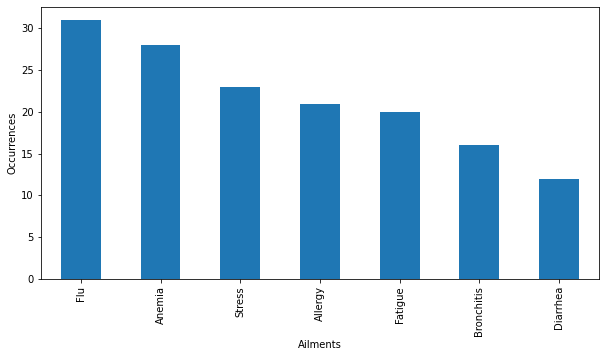

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
ailments_data['prompt'].value_counts().plot(kind='bar')
plt.xlabel('Ailments')
plt.ylabel('Occurrences')
plt.show()

In [37]:

from sklearn import preprocessing
import numpy
# Convert labels to numbers
le = preprocessing.LabelEncoder()
le.fit(ailments_data['prompt'])

le.classes_


y = le.transform(ailments_data['prompt'])
# print(le.inverse_transform(y))


# compare before and after
print(ailments_data['prompt'].value_counts())
unique, counts = numpy.unique(y, return_counts=True)
afterEncoder = dict(zip(unique, counts))
dict(sorted(afterEncoder.items(), key=lambda item: item[1], reverse=True))

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64


{5: 31, 1: 28, 6: 23, 0: 21, 4: 20, 2: 16, 3: 12}

In [54]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import qalsadi.lemmatizer
%pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def text_transform(message):

    # (a) change the message to lowercase
    message = message.lower()

    # (b) tokenize the message,
    # i.e. if input = 'i am a student.'
    # then, output  = ['i', 'am', 'a', 'student', '.']
    message = nltk.word_tokenize(message)

    # (c) remove special characters in the message
    msg_temp = []
    for word in message:
        # only accpet the alpha-numeric words and remove all other cases e.g. special characters
        if word.isalnum():
            msg_temp.append(word)

    message = msg_temp

    # (d) remove stopwords and punctuations
    msg_temp = []
    for word in message:
        if word not in stopwords.words('arabic') and word not in string.punctuation:
            msg_temp.append(word)

    message = msg_temp

    # (e) lemmatization function
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    msg_temp = []
    for word in message:
        msg_temp.append(lemmer.lemmatize(word))

    # join all words with space and return new message
    new_message = " ".join(msg_temp)

    return new_message


ailments_data
# apply the pre-processing steps via text_transform() function on text data
ailments_data['transformed_phrase'] = ailments_data['phrase'].apply(
    text_transform)

X = ailments_data.transformed_phrase
X.tail()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


147                                      قلق جدا
148                                   أراد نعسان
149    انزعاج قلق حسا نوع ظهر موت فقط يم أخف نفس
150                             شعر حزن والاحباط
151                    أطاع نوم خلال فترة امتحان
Name: transformed_phrase, dtype: object

In [56]:
ailments_data.head()

,phrase,prompt,transformed_phrase
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy,عانة صعوبة تنفس تكلم بلع
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy,عانة قيء الاسهال لم معد
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy,قد غمة علي وانا شعر توتر أن نبض قلب سريع
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy,أبدأ عطس عندما كون جوار زهرة
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy,صبح جلد حمر اتصال ملح


In [ ]:
#pip install qalsadi

In [52]:
# import qalsadi.lemmatizer
# lemmer = qalsadi.lemmatizer.Lemmatizer()
# lemmas = lemmer.lemmatize_text(ailments_data.iloc[1,0])

Exception ignored in: <function WordFreqDictionary.__del__ at 0x7fc0696beb00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/arramooz/wordfreqdictionaryclass.py", line 130, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140465340069760 and this is thread id 140464917538560.
Exception ignored in: <function ArabicDictionary.__del__ at 0x7fc068150290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/arramooz/arabicdictionary.py", line 112, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140465340069760 and this is thread id 140464917538560.
Exception ignored in: <function ArabicDictionary.__del__ at 0x7fc068150290>
Traceback (most recent call last):
  File "/usr/local/lib/p

In [53]:
# lemmas

['أنا', 'عانة', 'من', 'قيء', 'و', 'الاسهال', 'و', 'لم', 'في', 'معد']

Total number of unique words : 298


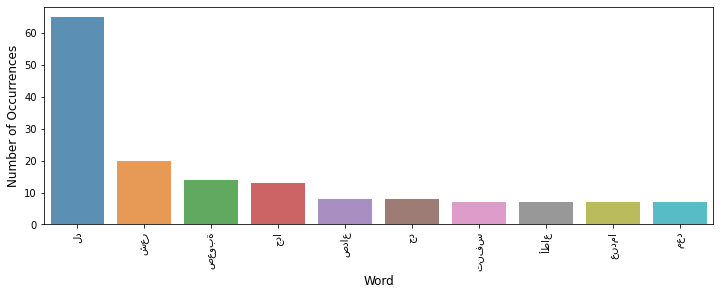

In [58]:
import seaborn as sns
# count unique words

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(ailments_data['transformed_phrase'])


num_unique_words = len(counter)
print("Total number of unique words : " + str(num_unique_words))

# print(counter)

counted_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(
    'count', ascending=False).reset_index(drop=True)  # create new df from counter

plt.figure(figsize=(12, 4))
# plot only the top 10 by slicing the df
sns.barplot(data=counted_df[:10], x='word', y='count', alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [59]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence


def get_max_input_length(docs):
    max_input_length = 1
    for document in docs:
        words = text_to_word_sequence(document)
        document_length = len(words)
        if document_length > max_input_length:
            max_input_length = document_length

    return max_input_length

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Vectorize a text corpus by turning each text into a sequence of integers

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(X)

# Each word has a unique index

word_index = tokenizer.word_index

word_index

{'لد': 1,
 'شعر': 2,
 'صعوبة': 3,
 'جدا': 4,
 'جد': 5,
 'صداع': 6,
 'تنفس': 7,
 'معد': 8,
 'عندما': 9,
 'أطاع': 10,
 'حلق': 11,
 'جلد': 12,
 'عانة': 13,
 'لم': 14,
 'قد': 15,
 'قلب': 16,
 'رأس': 17,
 'فقد': 18,
 'آلام': 19,
 'أنام': 20,
 'حس': 21,
 'شديد': 22,
 'جاف': 23,
 'شاحب': 24,
 'شهي': 25,
 'دار': 26,
 'تركيز': 27,
 'سعل': 28,
 'أراد': 29,
 'غثيان': 30,
 'حمى': 31,
 'بلع': 32,
 'الاسهال': 33,
 'سريع': 34,
 'صبح': 35,
 'حك': 36,
 'حساس': 37,
 'ضد': 38,
 'عين': 39,
 'جيد': 40,
 'سيلان': 41,
 'كنت': 42,
 'خفقان': 43,
 'سرع': 44,
 'جسم': 45,
 'شكل': 46,
 'ضعف': 47,
 'ليل': 48,
 'يألمني': 49,
 'نوم': 50,
 'انا': 51,
 'نعسان': 52,
 'التهاب': 53,
 'عرق': 54,
 'مشاكل': 55,
 'غضب': 56,
 'قلق': 57,
 'تكلم': 58,
 'قيء': 59,
 'غمة': 60,
 'أن': 61,
 'عطس': 62,
 'رقبة': 63,
 'غبار': 64,
 'مواد': 65,
 'بشر': 66,
 'أنف': 67,
 'يد': 68,
 'تقيأ': 69,
 'ظهر': 70,
 'وجه': 71,
 'أضاع': 72,
 'ولد': 73,
 'أظافر': 74,
 'ضعيف': 75,
 'حول': 76,
 'بيئة': 77,
 'داق': 78,
 'راسي': 79,
 'استيقظ': 80,
 'متزاي

In [84]:
X

array([[ 13,   3,   7, ...,   0,   0,   0],
       [ 13,  59,  33, ...,   0,   0,   0],
       [ 15,  60, 109, ..., 112,  16,  34],
       ...,
       [287,  57, 288, ..., 292, 293, 108],
       [  2, 294, 295, ...,   0,   0,   0],
       [ 10,  50, 296, ...,   0,   0,   0]], dtype=int32)

In [61]:

# Max number of words in a sequence
max_length = get_max_input_length(X)
print("max_length: ", max_length)

train_sequences = tokenizer.texts_to_sequences(X)


max_length:  10


In [88]:
train_sequences

[[13, 3, 7, 58, 32],
 [13, 59, 33, 14, 8],
 [15, 60, 109, 110, 2, 111, 61, 112, 16, 34],
 [113, 62, 9, 114, 115, 116],
 [35, 12, 117, 118, 119],
 [13, 120, 63],
 [62, 9, 121, 122, 64],
 [1, 36, 12],
 [1, 37, 65, 123],
 [1, 37, 38, 64],
 [66, 37, 38, 124],
 [1, 125, 12],
 [21, 126, 39],
 [127, 128, 10, 7, 40],
 [129, 130],
 [1, 41, 67],
 [1, 68, 131, 132, 42, 133, 65, 134],
 [135, 69, 136, 137, 138],
 [70, 139, 71, 72, 140],
 [1, 36, 22, 141, 142, 143],
 [144, 73, 145, 35, 23, 4],
 [24, 12, 146, 43, 147, 7],
 [1, 148, 149],
 [24, 39],
 [1, 71, 24],
 [1, 150, 2],
 [60],
 [151, 4, 1, 25],
 [16, 152, 44, 153],
 [1, 74, 154],
 [1, 45, 75],
 [1, 25],
 [1, 155, 39],
 [156, 4],
 [1, 157, 17, 26, 76, 77],
 [2, 77, 26, 76],
 [2, 42, 158, 159, 160, 4],
 [1, 43, 16, 78, 46, 161, 162, 78, 163, 164],
 [79, 26, 9, 80],
 [18, 165],
 [5, 3, 81, 27, 166, 6],
 [1, 25, 82, 167],
 [2, 47, 79, 26, 9, 80],
 [83, 168, 2, 169],
 [1, 3, 81, 27, 170, 171, 172, 173],
 [1, 2, 84],
 [1, 74, 84],
 [1, 43],
 [24],
 [

In [62]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(train_sequences, maxlen=max_length,
                  padding='post', truncating='post')

In [75]:
# LSTM model
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold


def LSTM(num_folds=10, embedding_dim=32, num_units=64, num_classes=25, num_epochs=20, batch_size=10,
         verbosity=0, loss_function='sparse_categorical_crossentropy', optimizer='adam'):

    # Model configuration
    # num_folds = 10
    # embedding_dim = 32
    # num_units = 64
    # num_classes = 25
    # num_epochs = 20
    # batch_size = 10
    # verbosity = 0
    # loss_function = 'sparse_categorical_crossentropy'
    # optimizer = 'adam'

    # define 10-fold cross validation
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=7)
    cvscores = []
    fold_num = 1
    for train, test in kfold.split(X, y):
        # Create model
        model = keras.models.Sequential()
        model.add(layers.Embedding(num_unique_words,
                                   embedding_dim, input_length=max_length))
        model.add(layers.LSTM(num_units, dropout=0.2, recurrent_dropout=0.2))
        model.add(layers.Dense(num_classes, activation="softmax"))
        # Compile model
        model.compile(loss=loss_function,
                      optimizer=optimizer, metrics=['accuracy'])
        # Fit the model
        print("Training fold number: ", fold_num)
        history = model.fit(X[train], y[train], epochs=num_epochs,
                            batch_size=batch_size, verbose=verbosity,
                            validation_data=(X[test], y[test]))

        # Evaluate the model
        scores = model.evaluate(X[test], y[test], verbose=verbosity)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

        # Visualize history
        # # Plot history: Loss
        # plt.plot(history.history['loss'])
        # plt.plot(history.history['val_loss'])
        # plt.title('Validation loss history')
        # plt.ylabel('Loss')
        # plt.xlabel('Epochs')
        # plt.legend(['train', 'validation'], loc='upper right')
        # plt.show()

        fold_num = fold_num + 1

    print("Average score: %.2f%%" % (np.mean(cvscores)))
    return model

In [76]:
model = LSTM()

Training fold number:  1
accuracy: 31.25%
Training fold number:  2
accuracy: 26.67%
Training fold number:  3
accuracy: 40.00%
Training fold number:  4
accuracy: 33.33%
Training fold number:  5
accuracy: 26.67%
Training fold number:  6
accuracy: 26.67%
Training fold number:  7
accuracy: 20.00%
Training fold number:  8
accuracy: 20.00%
Training fold number:  9
accuracy: 13.33%
Training fold number:  10
accuracy: 26.67%
Average score: 26.46%


In [77]:
from tensorflow.keras import models
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

def evaluate_model(model, X, y):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    predicted_targets = np.array([])
    actual_targets = np.array([])
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    for train, test in kfold.split(X, y):
        scores = model.evaluate(X[test], y[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        y_pred = model.predict(X[test]).argmax(axis=-1)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y[test])

        accuracy_list.append(metrics.accuracy_score(y[test], y_pred))
        precision_list.append(metrics.precision_score(
            y[test], y_pred, average='weighted'))
        recall_list.append(metrics.recall_score(
            y[test], y_pred, average='weighted'))
        f1_score_list.append(metrics.f1_score(
            y[test], y_pred, average='weighted'))

        # print(metrics.confusion_matrix(y[test], y_pred))

        # fpr, tpr, thresholds = metrics.roc_curve(y[test], y_pred)
        # roc_auc = metrics.auc(fpr, tpr)
        # roc_display = metrics.RocCurveDisplay(
        #     fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        # roc_display.plot()

    print("Average accuracy= ", np.mean(accuracy_list))
    print("Average precision= ", np.mean(precision_list))
    print("Average recall= ", np.mean(recall_list))
    print("Average f1_score= ", np.mean(f1_score_list))

    return predicted_targets, actual_targets

In [78]:
class_names = le.inverse_transform(y)

In [80]:

predicted_target, actual_target = evaluate_model(model, X, y)

accuracy: 62.50%
1/1 [==============================] - 1s 610ms/step
accuracy: 66.67%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 58ms/step
accuracy: 66.67%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
accuracy: 66.67%
1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 66.67%
1/1 [==============================] - 0s 40ms/step
accuracy: 86.67%
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 60.00%
1/1 [==============================] - 0s 27ms/step
accuracy: 80.00%
1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 60.00%
1/1 [==============================] - 0s 22ms/step
accuracy: 26.67%
1/1 [==============================] - 0s 24ms/step
Average accuracy=  0.6425
Average precision=  0.5156498015873016
Average recall=  0.6425
Average f1_score=  0.5490066137566136


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
X[test]

NameError: ignored